# Outliers

`1. IQR (Interquartile Range)`: A statistical method used to detect and remove outliers by calculating the range between the first quartile (Q1) and third quartile (Q3). Data points falling below Q1 - 1.5*IQR or above Q3 + 1.5*IQR are considered outliers.

`2. Z-score`: A statistical method used to detect and remove outliers by calculating the number of standard deviations a data point is away from the mean. Data points with a Z-score greater than 3 or less than -3 are considered outliers.


`# Bagic Data Load 👇`


In [76]:
#import all libraries 
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# load the Titanic dataset
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# IQR


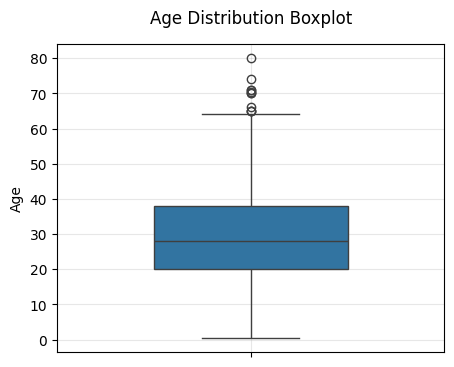

In [78]:
# Detect the outliers using IQR method and Grapical Representation
plt.figure(figsize=(5, 4))
sns.boxplot(data=data, y='age', width=0.5)
plt.title('Age Distribution Boxplot', fontsize=12, pad=15)
plt.ylabel('Age', fontsize=10)
plt.grid(True, alpha=0.3)


### 'o' dots is a outlers of age column


In [79]:
q1 = data['age'].quantile(0.25)
q3 = data['age'].quantile(0.75)
iqr = q3 - q1

In [80]:
q_min = q1 - 1.5 * iqr
q_max = q3 + 1.5 * iqr

q_min, q_max

(np.float64(-6.6875), np.float64(64.8125))

In [81]:
# remove a outlers 

data = data[data['age'] <= q_max]
data = data[data['age'] >= q_min]


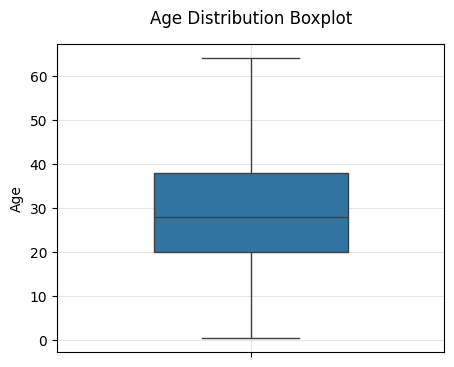

In [82]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=data, y='age', width=0.5)
plt.title('Age Distribution Boxplot', fontsize=12, pad=15)
plt.ylabel('Age', fontsize=10)
plt.grid(True, alpha=0.3)

# Remove outlers using Z-score


In [83]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,0.411095,2.244666,29.072077,0.519203,0.435277,34.785093
std,0.492383,0.835397,13.728478,0.934836,0.858015,53.255433
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,64.000000,5.000000,6.000000,512.329200


C:\Users\Admin\AppData\Local\Temp\ipykernel_12424\2894554508.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = data['fare'] )


<Axes: ylabel='Density'>

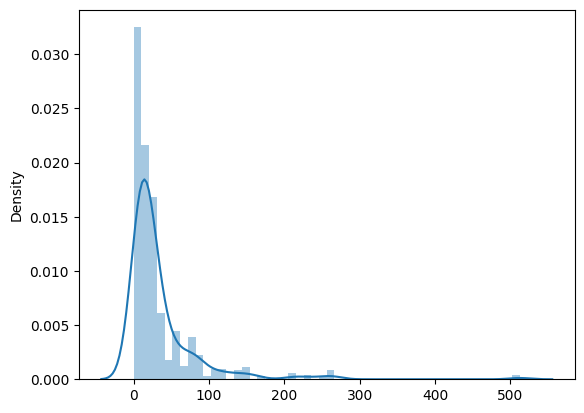

In [84]:
sns.distplot(x = data['fare'] )

In [85]:
# min and max range of 3 std
min_range = data['fare'].mean() - ( 3 * data['fare'].std() ) 
max_range = data['fare'].mean() + ( 3 * data['fare'].std() ) 
min_range , max_range

(np.float64(-124.98120692741645), np.float64(194.5513929871604))

In [86]:
data = data[data['fare'] <= max_range]

In [87]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [88]:
# find the z-score 
z_score = (data['fare'] - data['fare'].mean() ) / (data['fare'].std()) 


In [89]:
data['z_score'] = z_score

In [92]:
data[data['z_score'] > 3].shape

(20, 16)